In [1]:
options(warn=-1)
install.packages("igraph", type="binary")
library(igraph)


The downloaded binary packages are in
	/var/folders/7b/p7dpjf7x7t395n88dm4php8r0000gn/T//Rtmp1kBA1W/downloaded_packages



Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



### Question 3. Create a modified preferential attachment model that penalizes the age of a node

#### 3.(a) Each time a new vertex is added, it creates m links to old vertices and the probability that an old vertex is cited depends on its degree (preferential attachment) and age. Plot the degree distribution. In particular, the probability that a newly added vertex connects to an old vertex is proportional to : P[i] ~ (c * k_i^alpha + a) * (d * l_i^beta + b), where k_i is the degree of vertex i in the current time step, and l_i is the age of vertex i. Produce such an undirected network with 1000 nodes and parameter m = 1, alpha = 1, beta = -1, and a=c=d=1, b=0. Plot the degree distribution. What is the power law exponent?
(k_i + 1) * (1 / l_i)

In [2]:
g = sample_pa_age(1000, m=1, pa.exp=1, aging.exp=-1, zero.deg.appeal=1, zero.age.appeal=0, 
                 deg.coef=1, age.coef=1, directed=FALSE)

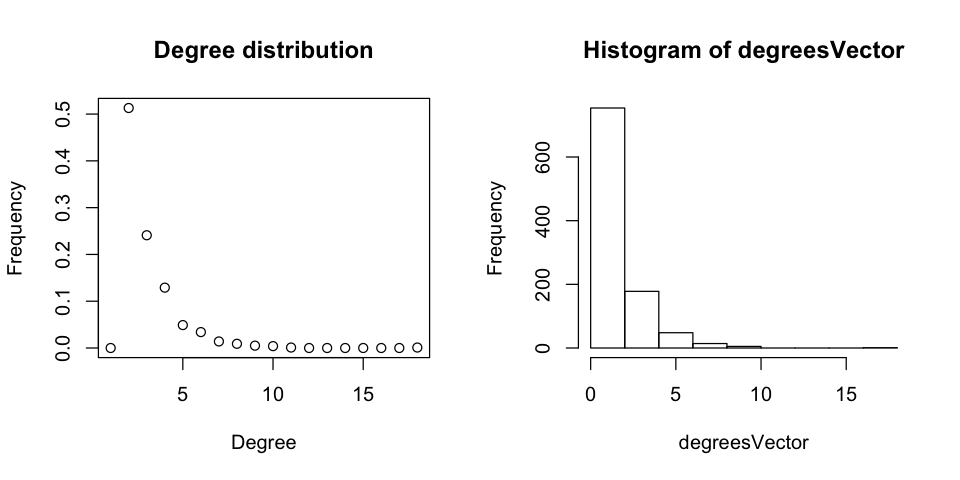

In [4]:
par(mfrow = c(1, 2))
options(repr.plot.width=8, repr.plot.height=4)
plot(degree.distribution(g), xlab="Degree",ylab="Frequency",
         main=paste0("Degree distribution"))
degreesVector <- degree(g)
hist(degreesVector)


Call:
lm(formula = logy[which(is.finite(logy) == TRUE)] ~ logx[which(is.finite(logy) == 
    TRUE)])

Residuals:
    Min      1Q  Median      3Q     Max 
-1.1894 -0.1083  0.1536  0.2949  0.6158 

Coefficients:
                                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)                            0.1236     0.4120    0.30    0.771    
logx[which(is.finite(logy) == TRUE)]  -2.5371     0.2288  -11.09  1.5e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5799 on 9 degrees of freedom
Multiple R-squared:  0.9318,	Adjusted R-squared:  0.9242 
F-statistic:   123 on 1 and 9 DF,  p-value: 1.502e-06


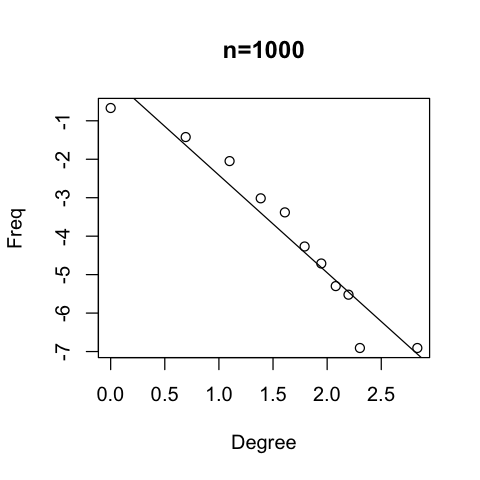

In [37]:
options(repr.plot.width=4, repr.plot.height=4)
# degree = degree.distribution(g)
# x <- seq(0, max(degree(g)), 1)

h = hist(degree(g), breaks=seq(min(degree(g))-0.5, max(degree(g))+0.5, by=1), plot=FALSE)
logx = log(h$mids)
logy = log(h$density)
plot(logx, logy, xlab="Degree",ylab="Freq", main="n=1000")
reg <- lm(logy[which(is.finite(logy) == TRUE)] ~ logx[which(is.finite(logy) == TRUE)])
abline(reg, untf = F)
summary(reg)

#### 3.(b) Use fast greedy method to find the community structure. What is the modularity?

In [33]:
fc <- cluster_fast_greedy(g)
membership(fc)
#cmsize <- sizes(fg)
#print(cmsize)
print(sprintf("modularity: %s", modularity(g, membership(fc))))

   [1]  3  4 21  5  3  4  1 24  5 24 24 24  3  4 12 12  1 12  9  1  9 12  9  9
  [25] 11  7  1 21  9 12  1 17  7 11  7  3  1 17  4 15 21 21  7  3  7 11  4 24
  [49]  5 29 21 25 17 15  5  5 21  5 24 12 25  5  9 21 20 15 24 16 15 25 15  5
  [73] 15 29  3 16  5 21  9  3  3 12  3 26 25 24 26 26 22 17 28  3  3 16 26  5
  [97]  1 26  2 25 20 25  2 25 25 11 22  1 12 25 26  1 26  6 25 21  1  2 21 21
 [121] 16 21  9 21  6 17 24 12 22 31  8  6  3  6 20  9 28 26 21 28 16 26 24  6
 [145] 25 17 21 22  2 22 13 25  1 16 16 11 15  2  3 17  7 17  9  6  8  3 26 12
 [169] 25  6 25  6  6  6  9 12 25  2 13 13  8  6 15  1 12 25  1  1  4  1  3 21
 [193]  1  9  5 26  9  2  2  3  1  6  4 24  2  6  9  6 21  9  6  8  6  9  9  2
 [217] 18  9  3  6  4 16  9  8 12  5 29  6  1  2 15  8 17  9  8 17  5  9  6 18
 [241] 24  6  2 18  3  3  5 12  9  3  2  5 12  9  2 28  1 12  5 12  6  8  9  1
 [265]  4  8  2 16  8  8  8  8  1 15  8 21  8 29  5  8 11 12 23 20 11  8 20  3
 [289] 20 12 25 20 14  8  1  3 20  6 14  1 20 18 23 

[1] "modularity: 0.935457479501524"


In [34]:
sizes(fc)

Community sizes
 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 
44 44 51 42 40 41 40 38 35 40 37 40 35 33 32 32 33 32 30 30 27 27 26 22 23 23 
27 28 29 30 31 
21 21 21 20 20 